In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
df.shape

(400, 9)

In [39]:
df.drop(columns=['Serial No.'],inplace=True)

In [41]:
x=df.iloc[:,0:-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [42]:
y=df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [45]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,338,117,4,3.5,4.5,9.46,1
85,319,103,4,4.5,3.5,8.66,0
375,304,101,2,2.0,2.5,7.66,0
208,305,106,2,3.0,3.0,8.16,0
161,298,99,1,1.5,3.0,7.46,0
...,...,...,...,...,...,...,...
32,338,118,4,3.0,4.5,9.40,1
36,299,106,2,4.0,4.0,8.40,0
42,313,107,2,2.5,2.0,8.50,1
393,317,104,2,3.0,3.0,8.76,0


In [46]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [48]:
x_train_scaled=scaler.fit_transform(x_train)

In [49]:
x_test_scaled=scaler.fit_transform(x_test)

In [51]:
x_train_scaled

array([[0.96      , 0.88888889, 0.75      , ..., 0.875     , 0.85530547,
        1.        ],
       [0.58      , 0.37037037, 0.75      , ..., 0.625     , 0.59807074,
        0.        ],
       [0.28      , 0.2962963 , 0.25      , ..., 0.375     , 0.27652733,
        0.        ],
       ...,
       [0.46      , 0.51851852, 0.25      , ..., 0.25      , 0.54662379,
        1.        ],
       [0.54      , 0.40740741, 0.25      , ..., 0.5       , 0.63022508,
        0.        ],
       [0.98      , 0.85185185, 0.75      , ..., 0.625     , 0.96463023,
        1.        ]])

In [50]:
x_test_scaled

array([[0.36956522, 0.42857143, 0.5       , 0.625     , 0.14285714,
        0.34351145, 1.        ],
       [0.36956522, 0.25      , 0.        , 0.375     , 0.42857143,
        0.43129771, 1.        ],
       [0.2173913 , 0.17857143, 0.25      , 0.125     , 0.14285714,
        0.12977099, 0.        ],
       [0.5       , 0.53571429, 0.5       , 0.625     , 0.42857143,
        0.52671756, 1.        ],
       [0.82608696, 0.92857143, 1.        , 1.        , 1.        ,
        0.82824427, 1.        ],
       [0.52173913, 0.60714286, 0.5       , 0.5       , 0.42857143,
        0.45801527, 0.        ],
       [0.47826087, 0.42857143, 0.5       , 0.5       , 0.57142857,
        0.26717557, 1.        ],
       [0.84782609, 0.89285714, 0.75      , 1.        , 0.71428571,
        0.90076336, 1.        ],
       [0.45652174, 0.46428571, 0.5       , 0.25      , 0.28571429,
        0.39694656, 0.        ],
       [0.91304348, 0.96428571, 1.        , 0.75      , 0.57142857,
        0.95419847, 1. 

In [52]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
model=Sequential()

In [103]:
model.add(Dense(11,activation='relu',input_dim=7))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='linear'))

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                88        
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
 dense_2 (Dense)             (None, 11)                22        
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
 dense_5 (Dense)             (None, 11)                22        
                                                                 
 dense_6 (Dense)             (None, 11)                1

In [105]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [111]:
history=model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 2/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 9/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 10/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 11/50
8/8 [==============

In [112]:
y_pred=model.predict(x_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [113]:
y_pred

array([[0.5911229 ],
       [0.6043875 ],
       [0.44330478],
       [0.6991901 ],
       [0.9390167 ],
       [0.6559376 ],
       [0.61203796],
       [0.9250604 ],
       [0.6177062 ],
       [0.955693  ],
       [0.7880659 ],
       [0.93426394],
       [0.5183956 ],
       [0.661852  ],
       [0.5951313 ],
       [0.6692049 ],
       [0.7007076 ],
       [0.7223487 ],
       [0.4885477 ],
       [0.62895226],
       [0.71838945],
       [0.48813936],
       [0.677864  ],
       [0.49121878],
       [0.7991044 ],
       [0.46491045],
       [0.99749964],
       [0.60981625],
       [0.73693544],
       [0.5028955 ],
       [0.7594528 ],
       [0.69119126],
       [0.95595163],
       [0.7427961 ],
       [0.671151  ],
       [0.65651625],
       [0.8990062 ],
       [0.4966313 ],
       [0.6141475 ],
       [0.6983703 ],
       [0.76713747],
       [0.7798535 ],
       [0.4470772 ],
       [0.84936386],
       [0.84405774],
       [0.5793776 ],
       [0.66971713],
       [0.534

In [114]:
from sklearn.metrics import r2_score

In [115]:
r2_score(y_test,y_pred)

0.708312930676227

In [116]:
import matplotlib.pyplot as plt


KeyError: 'Val_loss'

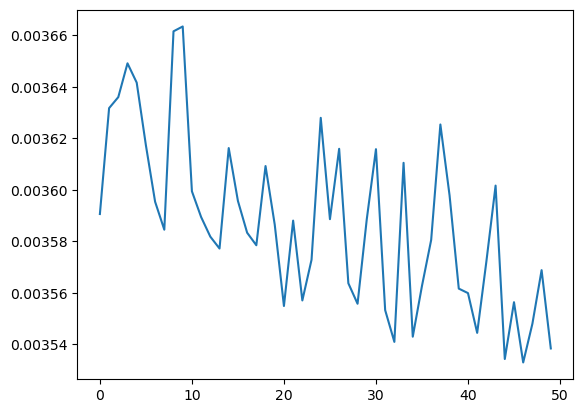

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['Val_loss'])